# Mini-curso: Keras + TensorFlow (rápido)

Este notebook explica passo a passo como usar a API Keras do TensorFlow para treinar um modelo simples no dataset MNIST (dígitos manuscritos). Cada célula tem uma explicação curta seguida pelo código executável. Ideal para Colab ou Jupyter local.

## 1) Setup e imports

Aqui importamos TensorFlow/Keras e bibliotecas auxiliares. Em Colab normalmente não é preciso instalar TensorFlow; localmente instale com `pip install -r requirements.txt`.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
print('TF version:', tf.__version__)

TF version: 2.20.0


## 2) Carregando os dados (MNIST)

O MNIST já está disponível em `keras.datasets`. Vamos carregar, normalizar e visualizar alguns exemplos.

train shape: (60000, 28, 28, 1) train labels: (60000,)


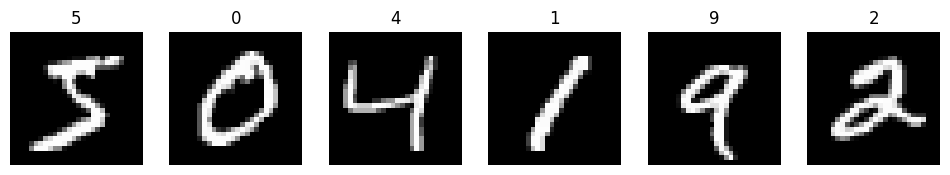

In [16]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# adicionar canal explicito
x_train = x_train[..., np.newaxis].astype('float32')
x_test = x_test[..., np.newaxis].astype('float32')
print('train shape:', x_train.shape, 'train labels:', y_train.shape)
# visualizar 6 exemplos
fig, axes = plt.subplots(1,6, figsize=(12,2))
for i,ax in enumerate(axes):
    ax.imshow(x_train[i].squeeze(), cmap='gray')
    ax.set_title(str(y_train[i]))
    ax.axis('off')
plt.show()

## 3) Construindo um modelo com Keras

Aqui criamos um modelo sequencial simples com camadas Convolution + Pooling + Dense. Explicarei cada camada no comentário do código.

In [17]:
def build_model(input_shape=(28,28,1), num_classes=10):
    model = keras.Sequential([
        keras.layers.Input(shape=input_shape),  # forma da entrada
        keras.layers.Rescaling(1./255),        # normalização simples
        keras.layers.Conv2D(32, 3, activation='relu'),
        keras.layers.MaxPool2D(),
        keras.layers.Conv2D(64, 3, activation='relu'),
        keras.layers.MaxPool2D(),
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

model = build_model()
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)         │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

## 4) Treinando o modelo

Vamos treinar por poucas épocas para demonstrar o fluxo. Em produçao você aumentaria epochs e aplicaria callbacks (ModelCheckpoint, EarlyStopping).

Epoch 1/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9573 - loss: 0.1392 - val_accuracy: 0.9855 - val_loss: 0.0458
Epoch 2/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9573 - loss: 0.1392 - val_accuracy: 0.9855 - val_loss: 0.0458
Epoch 2/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9854 - loss: 0.0460 - val_accuracy: 0.9898 - val_loss: 0.0389
Epoch 3/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9854 - loss: 0.0460 - val_accuracy: 0.9898 - val_loss: 0.0389
Epoch 3/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9907 - loss: 0.0306 - val_accuracy: 0.9902 - val_loss: 0.0334
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9907 - loss: 0.0306 - val_accuracy: 0.9902 - val_loss: 0.0334


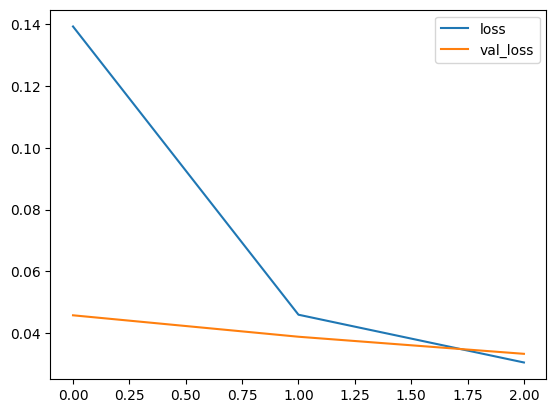

In [18]:
history = model.fit(x_train, y_train, epochs=3, validation_split=0.1)
# plotar perda e acurácia
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

## 5) Salvar o modelo e reuso

Salve o modelo em um arquivo `.keras` e também salve metadados (por exemplo: classes, input_shape) se precisar.

In [19]:
import os
os.makedirs('model', exist_ok=True)
model.save('model/mnist.keras')
# salvar metadados simples
import numpy as np
np.savez_compressed('model/mnist_metadata.npz', input_shape=(28,28,1), classes=10)
print('Modelo e metadados salvos em ./model')

Modelo e metadados salvos em ./model


## 6) Inferência: carregar e prever uma imagem

Agora mostramos como carregar o modelo salvo e fazer previsões em imagens isoladas (local, upload ou URL).

In [23]:
from PIL import Image
def preprocess_pil(img, target=(28,28)):
    img = img.convert('L').resize(target)
    arr = np.array(img)[..., np.newaxis].astype('float32')/255.0
    return arr

def predict_image(path):
    model = keras.models.load_model('model/mnist.keras')
    img = Image.open(path)
    x = preprocess_pil(img)
    y = model.predict(x[np.newaxis,...])
    return np.argmax(y, axis=1)[0], np.max(y)

# Teste rápido se existir
from pathlib import Path
p = Path('D:\GitHub\MiniCursoPalestra\keras_minicurso\quatro.jpg')
if p.exists():
    label, score = predict_image(str(p))
    print('Predição:', label, 'score:', float(score))
else:
    print('Coloque um arquivo sample_mnist.png na pasta para testar a inferência.')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


<>:16: SyntaxWarning: invalid escape sequence '\G'
<>:16: SyntaxWarning: invalid escape sequence '\G'
C:\Users\leona\AppData\Local\Temp\ipykernel_3572\3346543665.py:16: SyntaxWarning: invalid escape sequence '\G'
  p = Path('D:\GitHub\MiniCursoPalestra\keras_minicurso\quatro.jpg')


Predição: 1 score: 0.11644083261489868


---
### Próximos passos sugeridos
- Aumentar epochs e usar callbacks (ModelCheckpoint, EarlyStopping)
- Experimentar augmentations com tf.data ou ImageDataGenerator
- Testar Transfer Learning com MobileNetV2 para reduzir custo computacional

## Bônus: Exemplo rápido de CNN em CIFAR-10

Nesta seção mostramos os passos para treinar uma CNN simples no dataset CIFAR-10 (imagens coloridas 32x32). O objetivo é demonstrar: carregar os dados, construir um modelo convolutional, treinar rapidamente, avaliar e salvar o modelo.

In [21]:
# Célula: treino rápido em CIFAR-10 (poucas épocas para demonstração)
from tensorflow import keras
import numpy as np
(x_tr, y_tr), (x_te, y_te) = keras.datasets.cifar10.load_data()
# normalizar para [0,1]
x_tr = x_tr.astype('float32')/255.0
x_te = x_te.astype('float32')/255.0
print('CIFAR shapes:', x_tr.shape, y_tr.shape)
# construir modelo simples
def build_cifar_model(input_shape=(32,32,3), num_classes=10):
    model = keras.Sequential([
        keras.layers.Input(shape=input_shape),
        keras.layers.Conv2D(32,3,activation='relu'),
        keras.layers.MaxPool2D(),
        keras.layers.Conv2D(64,3,activation='relu'),
        keras.layers.MaxPool2D(),
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

model_cifar = build_cifar_model()
model_cifar.summary()
# treinar rápido (ex: 3 épocas) apenas para demonstração
history = model_cifar.fit(x_tr, y_tr, epochs=3, validation_split=0.1)
# avaliar
loss, acc = model_cifar.evaluate(x_te, y_te, verbose=0)
print('Test loss:', loss, 'Test acc:', acc)
# salvar
import os
os.makedirs('model', exist_ok=True)
model_cifar.save('model/cifar_cnn.keras')
print('Modelo CIFAR salvo em model/cifar_cnn.keras')
# predição de exemplo
idx = 0
pred = model_cifar.predict(x_te[idx:idx+1])
print('label real:', int(y_te[idx]), 'predito:', int(pred.argmax()))

CIFAR shapes: (50000, 32, 32, 3) (50000, 1)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.4860 - loss: 1.4317 - val_accuracy: 0.5844 - val_loss: 1.1792
Epoch 2/3
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.4860 - loss: 1.4317 - val_accuracy: 0.5844 - val_loss: 1.1792
Epoch 2/3
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6233 - loss: 1.0741 - val_accuracy: 0.6568 - val_loss: 0.9863
Epoch 3/3
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6233 - loss: 1.0741 - val_accuracy: 0.6568 - val_loss: 0.9863
Epoch 3/3
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6755 - loss: 0.9326 - val_accuracy: 0.6672 - val_loss: 0.9575
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6755 - loss: 0.9326 - val_accuracy: 0.6672 - val_loss: 0.9575
Test loss: 0.9879927635192871 Test acc: 0.6579999923706055
Modelo CIFAR salvo em model/cifar_cnn.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/stepTest loss: 0.9879927635192871 Test acc: 0.6579999923706055
Modelo CIFAR salvo em model/cifar_cnn

C:\Users\leona\AppData\Local\Temp\ipykernel_3572\1152153580.py:39: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('label real:', int(y_te[idx]), 'predito:', int(pred.argmax()))
